# 感知机
## 二分类模型
**模型** 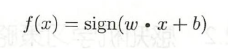
**损失函数** 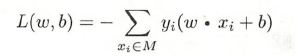
**算法-梯度下降** 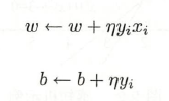

## 数据准备

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# 加载鸢尾花卉数据集 150*5 花萼长度 花萼宽度 花瓣长度 花瓣宽度 属种（三种鸢尾花）
iris = load_iris() 
# iris.data 包括了前四列（长度 宽度 。。。）iris.target 包括了属种
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['lable'] = iris.target

In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
#value_counts统计不同值在该列的占比
#统计label不同值的数量
df.label.value_counts()
# 打印df第一行 iloc[i, :]第i行 iloc[:, i]第i列
print(df.iloc[0, :])
# print(df.iloc[:, 0])

sepal length    5.1
sepal width     3.5
petal length    1.4
petal width     0.2
label           0.0
Name: 0, dtype: float64


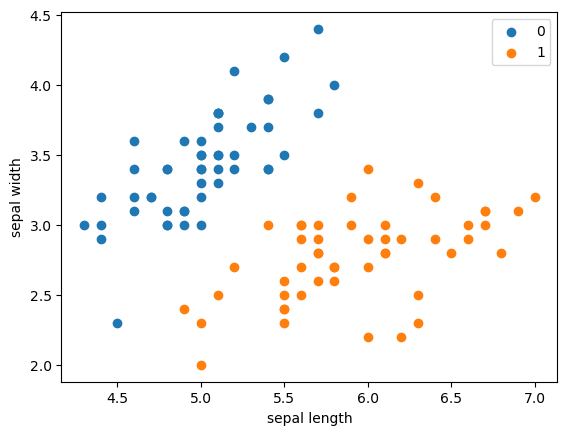

In [4]:
# 第一种鸢尾花
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0') 
# 第二种鸢尾花
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1') 
# plt.scatter(df[100:150]['sepal length'], df[100:150]['sepal width'], label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
# legend（） 加上默认参数 比如图中右上角
plt.legend()
plt.show()

In [5]:
# 去除df中前100行，第一列,第二列和最后一列
data = np.array(df.iloc[:100, [0, 1, -1]])
print(data[0])
# 将data除了最后一列 其他都赋值给X，通常表示特征数据，
# 将data最后一列赋值给y,通常表示目标变量或标签
X, y = data[:,:-1], data[:,-1]
# 将原始y数组中等于1的值设为1，而不等于1的值设为-1(将0类型设置为 -1，1类型设置为 1)
y = np.array([1 if i == 1 else -1 for i in y])

[5.1 3.5 0. ]


## Perceptron

### 手工搭建

In [6]:
# data[0] 表示data的第一个维度的长度，有3个，分别是长度，宽度和标签 data[0]-1指的是特征数据的维度
print(len(data[0]))

3


In [7]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程 感知机模型
class Model:
    # self.w为权重 self.b为偏置 self.l_rate为学习率
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype = np.float32)
        self.b = 0
        self.l_rate = 0.1
#         self.data = data
    # 线性变换后的结果
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
#     随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return "Perception Model!"
    # 评估模型
    def score(self):
        pass

In [8]:
# 感知器模型对象
perceptron = Model()
perceptron.fit(X, y)

'Perception Model!'

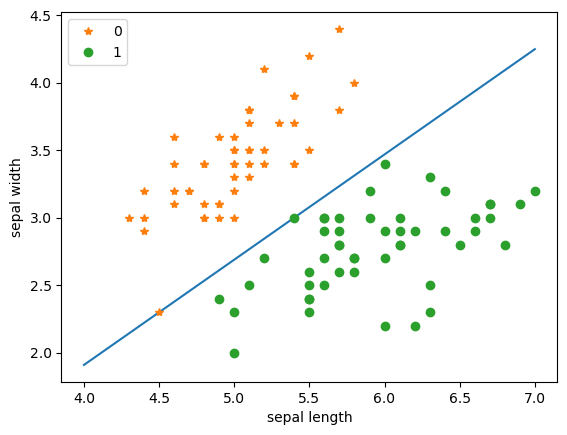

In [9]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], '*', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### sklearn 集成

In [10]:
from sklearn.linear_model import Perceptron

In [11]:
# 创建感知器模型，并设置参数
clf = Perceptron(fit_intercept=True, max_iter=1000,eta0=0.1,  shuffle=True, tol=None)
print(clf.get_params())
# 使用模型进行训练
clf.fit(X, y)

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': None, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Perceptron(eta0=0.1, tol=None)

In [12]:
# 权重向量
print(clf.coef_)
w = clf.coef_[0]
# 偏置
print(clf.intercept_)
b = clf.intercept_

[[ 6.95 -8.73]]
[-11.2]


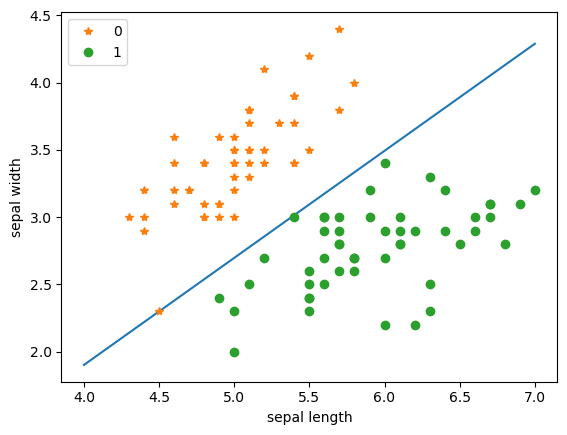

In [13]:
x_points = np.linspace(4, 7,10)
y_ = -(w[0] * x_points + b)/w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], '*', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()